# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
# Dependencies
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from config import weather_api_key
import time
from scipy.stats import linregress

## Generate Cities List

In [10]:
# get data file
csv_file = "../output_data/cities.csv"

# Read in the csv file
file_df = pd.read_csv(csv_file)
file_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


In [11]:
cities = file_df["City"]
cities.count()

548

In [12]:
city_count = []
for x in cities:
    city_count.append(x)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
#Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

In [14]:
# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [15]:
# set up empty lists to hold reponse info
city_name = []
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

In [16]:
print("Beginning Data Retrieval")
print("------------------------")

# set record counter so loop will increase for every output
record = 1

# Loop through the list of cities and perform a request for data on each city

for city in city_count: 
        response = requests.get(query_url + city).json() 
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        
        # create a variable so we can see which city has been processed in the output
        output_city = response["name"]

        
        #print results 
        print(f"Processing Record {record} of Set 1 | {output_city}")

        # increase record counter by one 
        record = record + 1
        
        # put a sleep timer on the loop so that we do not send too many requests in one go
        time.sleep(1)

t 1 | Pontes e Lacerda
Processing Record 78 of Set 1 | Khor
Processing Record 79 of Set 1 | Crotone
Processing Record 80 of Set 1 | Bāglung
Processing Record 81 of Set 1 | Raglan
Processing Record 82 of Set 1 | Jamestown
Processing Record 83 of Set 1 | Sur
Processing Record 84 of Set 1 | Araouane
Processing Record 85 of Set 1 | Emerald
Processing Record 86 of Set 1 | Launceston
Processing Record 87 of Set 1 | Nikolskoye
Processing Record 88 of Set 1 | Ambilobe
Processing Record 89 of Set 1 | Cidreira
Processing Record 90 of Set 1 | Ternate
Processing Record 91 of Set 1 | Tarauacá
Processing Record 92 of Set 1 | Bella Vista
Processing Record 93 of Set 1 | Xichang
Processing Record 94 of Set 1 | Antakya
Processing Record 95 of Set 1 | Najrān
Processing Record 96 of Set 1 | Agirish
Processing Record 97 of Set 1 | Mataura
Processing Record 98 of Set 1 | Katsuura
Processing Record 99 of Set 1 | Shalinskoye
Processing Record 100 of Set 1 | Barrow
Processing Record 101 of Set 1 | Sorong
Proce

In [18]:
# Create a dictonary with the stored lists generated
weather_dic = {
    "City": city_name,
    "Latitude": lat, 
    "Longitude": lon,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date    
}

# Create data frame from dictionary
weather_df = pd.DataFrame(weather_dic)
weather_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ostrovnoy,68.0531,39.5131,-16.69,89,100,8.44,RU,1611890805
1,Mahébourg,-20.4081,57.7000,26.00,78,40,4.12,MU,1611890806
2,Qaanaaq,77.4840,-69.3632,-25.26,65,0,2.94,GL,1611890807
3,Zhuhai,22.2769,113.5678,18.33,51,0,6.17,CN,1611890699
4,Cape Town,-33.9258,18.4232,16.11,88,0,0.51,ZA,1611890810
...,...,...,...,...,...,...,...,...,...
543,Yabrūd,33.9674,36.6574,7.00,81,75,9.26,SY,1611891446
544,Paraíso,9.8383,-83.8656,22.00,64,0,9.77,CR,1611891448
545,Verāval,20.9000,70.3667,20.04,29,0,6.46,IN,1611891449
546,Novyy Urgal,51.0736,132.5642,-25.58,81,79,0.51,RU,1611891450


In [19]:
# Save dataframe to CSV
weather_df.to_csv("../output_data/weather_data.csv", index = False)

In [20]:
weather_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,5.480000e+02
mean,19.502709,22.445368,8.524526,73.874088,52.388686,3.683905,1.611891e+09
std,33.404166,91.906309,18.998984,18.870593,40.102570,2.804346,1.949955e+02
min,-54.800000,-175.200000,-45.990000,18.000000,0.000000,0.110000,1.611890e+09
25%,-6.473700,-62.060550,-4.000000,65.000000,2.750000,1.540000,1.611891e+09
50%,20.880800,25.676700,15.000000,78.000000,58.000000,3.020000,1.611891e+09
75%,47.892200,108.176850,23.860000,87.000000,90.000000,5.140000,1.611891e+09
max,78.218600,179.316700,38.000000,100.000000,100.000000,17.020000,1.611891e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [21]:
# check if there are any values greater than 100
weather_df["Humidity"].max()

100

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

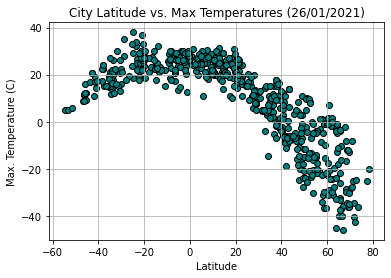

-The max temp gets higher towards the equator (at Latitude 0) and lower away from the equator


In [23]:
# plot the graph for 26/01/2021
plt.scatter(weather_df["Latitude"], weather_df["Max Temp"], marker = "o", color = "teal", edgecolors='black')

# give graph headings
plt.title("City Latitude vs. Max Temperatures (26/01/2021)")
plt.ylabel("Max. Temperature (C)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("../Images/temp_v_latitude.png")

# Show plot
plt.show()
print("-The max temp gets higher towards the equator (at Latitude 0) and lower away from the equator")

## Latitude vs. Humidity Plot

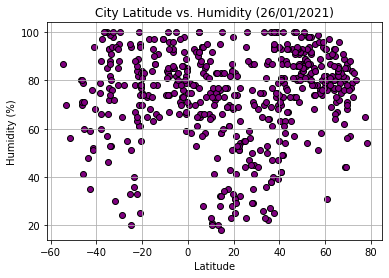

-Humidity at the equator (at Latitude 0) is generally higher, with more variation in percentage away from the equator.
-Above the equator, humidity is generally higher whereas humidity below the equator is spread out


In [24]:
# plot the graph for 26/01/2021
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker = "o", color = "purple", edgecolors='black')

# give graph headings
plt.title("City Latitude vs. Humidity (26/01/2021)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("../Images/humidity_vs_latitude.png")

# Show plot
plt.show()
print("-Humidity at the equator (at Latitude 0) is generally higher, with more variation in percentage away from the equator.")
print("-Above the equator, humidity is generally higher whereas humidity below the equator is spread out")

## Latitude vs. Cloudiness Plot

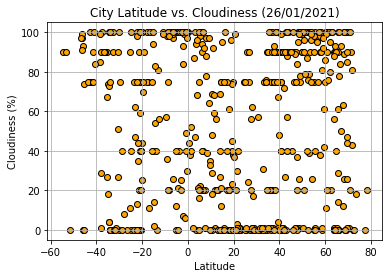

-Cloudiness is spread out and to the eye there doesn't seem to be much correlation


In [25]:
# plot the graph for 26/01/2021
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], marker = "o", color = "orange", edgecolors='black')

# give graph headings
plt.title("City Latitude vs. Cloudiness (26/01/2021)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("../Images/cloudiness_vs_latitude.png")

# Show plot
plt.show()
print("-Cloudiness is spread out and to the eye there doesn't seem to be much correlation")

## Latitude vs. Wind Speed Plot

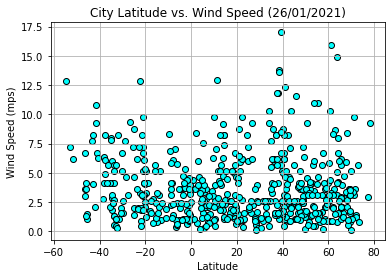

-Higher and slightly lower windspeeds are recorded moving further away from the equator


In [26]:
# plot the graph for 26/01/2021
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], marker = "o", color = "cyan", edgecolors='black')

# give graph headings
plt.title("City Latitude vs. Wind Speed (26/01/2021)")
plt.ylabel("Wind Speed (mps)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("../Images/windspeed_vs_latitude.png")

# Show plot
plt.show()
print("-Higher and slightly lower windspeeds are recorded moving further away from the equator")

## Linear Regression

In [27]:
# create new data frame for northern hemisphere
north_df = weather_df

In [28]:
# filter out lattitude rows that are more or equal to 0
ncolumns = ["City", "Latitude", "Longitude", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"]
clean_north_df = north_df[north_df['Latitude'] >= 0][ncolumns]
clean_north_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ostrovnoy,68.0531,39.5131,-16.69,89,100,8.44,RU,1611890805
2,Qaanaaq,77.4840,-69.3632,-25.26,65,0,2.94,GL,1611890807
3,Zhuhai,22.2769,113.5678,18.33,51,0,6.17,CN,1611890699
8,Tiksi,71.6872,128.8694,-34.46,84,81,3.62,RU,1611890814
9,Pushkinskiye Gory,57.0209,28.9103,-3.05,99,97,1.61,RU,1611890815
...,...,...,...,...,...,...,...,...,...
543,Yabrūd,33.9674,36.6574,7.00,81,75,9.26,SY,1611891446
544,Paraíso,9.8383,-83.8656,22.00,64,0,9.77,CR,1611891448
545,Verāval,20.9000,70.3667,20.04,29,0,6.46,IN,1611891449
546,Novyy Urgal,51.0736,132.5642,-25.58,81,79,0.51,RU,1611891450


In [29]:
# create new data frame for southern hemisphere
south_df = weather_df

In [30]:
# filter out lattitude rows that are less than 0
scolumns = ["City", "Latitude", "Longitude", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"]
clean_south_df = south_df[south_df['Latitude'] < 0][scolumns]
clean_south_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Mahébourg,-20.4081,57.7000,26.00,78,40,4.12,MU,1611890806
4,Cape Town,-33.9258,18.4232,16.11,88,0,0.51,ZA,1611890810
5,Atuona,-9.8000,-139.0333,25.92,74,57,8.33,PF,1611890811
6,Flinders,-34.5833,150.8552,21.11,93,100,1.79,AU,1611890812
7,Opuwo,-18.0607,13.8400,21.23,73,100,1.70,NA,1611890813
...,...,...,...,...,...,...,...,...,...
523,Kununurra,-15.7667,128.7333,30.00,84,40,5.66,AU,1611891423
526,Viedma,-40.8135,-62.9967,17.22,68,84,6.23,AR,1611891427
536,Padang,-0.9492,100.3543,30.00,66,40,3.60,ID,1611891438
539,Palu,-0.8917,119.8707,29.36,67,100,1.57,ID,1611891442


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r vale is: -0.8814597226001338


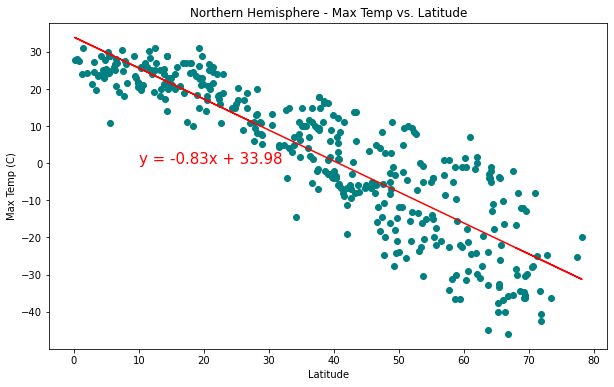

In [31]:
# Calculate the linear regression model for Northern Hemisphere - Max Temp vs. Latitude
x_values = clean_north_df["Latitude"]
y_values = clean_north_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(10, 6))
plt.scatter(x_values,y_values, color = "teal")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title("Northern Hemisphere - Max Temp vs. Latitude")

# Save the figure
plt.savefig("../Images/north_temp_vs_latitude.png")

print(f"The r vale is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r vale is: 0.5703986782043452


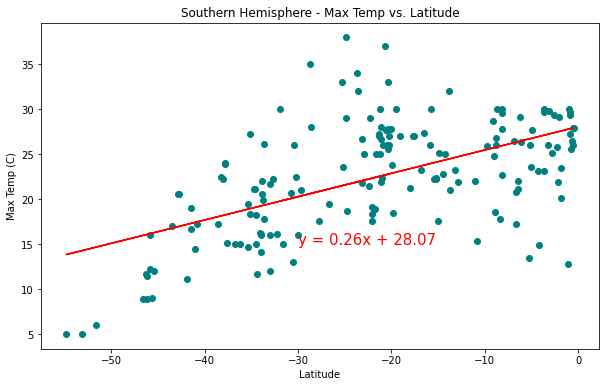

In [32]:
# Calculate the linear regression model for Southern Hemisphere - Max Temp vs. Latitude
x_values = clean_south_df["Latitude"]
y_values = clean_south_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(10, 6))
plt.scatter(x_values,y_values, color = "teal")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title("Southern Hemisphere - Max Temp vs. Latitude")

# Save the figure
plt.savefig("../Images/south_temp_vs_latitude.png")

print(f"The r vale is: {rvalue}")
plt.show()

In [33]:
print("-There is a strong negative correlation of Max Temp and Latitude in the Northern Hemisphere")
print("-This could be a result of the proximity to the North Pole")
print("-There is a positive correlation of Max Temp and Latitude in the Southern Hemisphere")
print("-This could be a result of the current Summer season and temps are warmer as the South Pole is not as close to the continents as the North Pole.")

-There is a strong negative correlation of Max Temp and Latitude in the Northern Hemisphere
-This could be a result of the proximity to the North Pole
-There is a positive correlation of Max Temp and Latitude in the Southern Hemisphere
-This could be a result of the current Summer season and temps are warmer as the South Pole is not as close to the continents as the North Pole.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r vale is: 0.27259021731591915


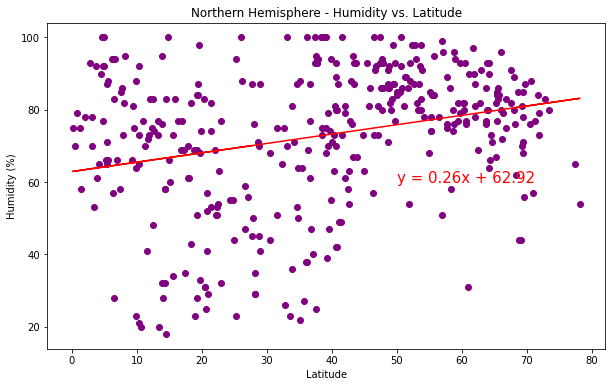

In [34]:
# Calculate the linear regression model for Northern Hemisphere - Humidity (%) vs. Latitude
x_values = clean_north_df["Latitude"]
y_values = clean_north_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(10, 6))
plt.scatter(x_values,y_values, color = "purple")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,60),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity vs. Latitude")

# Save the figure
plt.savefig("../Images/north_humidity_vs_latitude.png")

print(f"The r vale is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r vale is: 0.20466071137712522


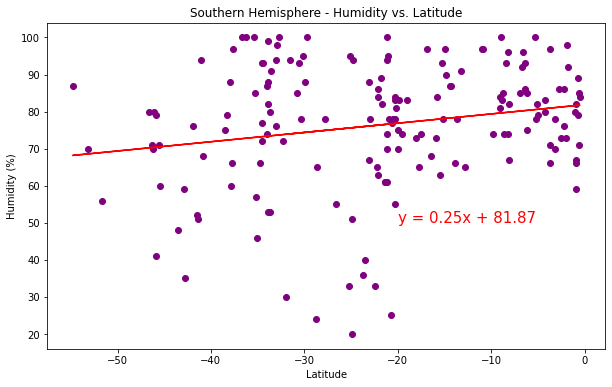

In [35]:
# Calculate the linear regression model for Southern Hemisphere - Humidity (%) vs. Latitude
x_values = clean_south_df["Latitude"]
y_values = clean_south_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(10, 6))
plt.scatter(x_values,y_values, color = "purple")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity vs. Latitude")

# Save the figure
plt.savefig("../Images/south_humidity_vs_latitude.png")

print(f"The r vale is: {rvalue}")
plt.show()

In [36]:
print("-Both Northern and Southern Hemispheres have a positive correlation.")
print("-This could be as a result of Winter in the North and Summer in the South")

-Both Northern and Southern Hemispheres have a positive correlation.
-This could be as a result of Winter in the North and Summer in the South


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r vale is: 0.20683101501359263


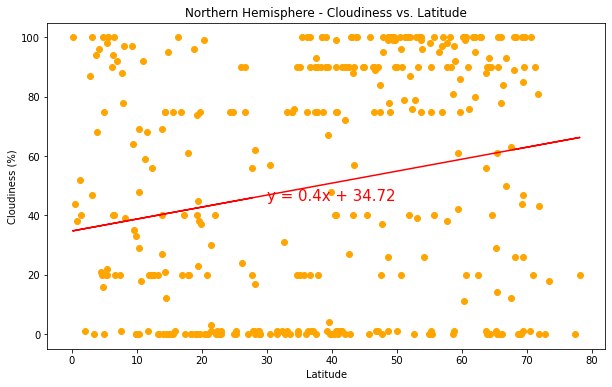

In [37]:
# Calculate the linear regression model for Northern Hemisphere - Cloudiness (%) vs. Latitude
x_values = clean_north_df["Latitude"]
y_values = clean_north_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(10, 6))
plt.scatter(x_values,y_values, color = "orange")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,45),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude")

# Save the figure
plt.savefig("../Images/north_coudiness_vs_latitude.png")

print(f"The r vale is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r vale is: 0.11010364902652374


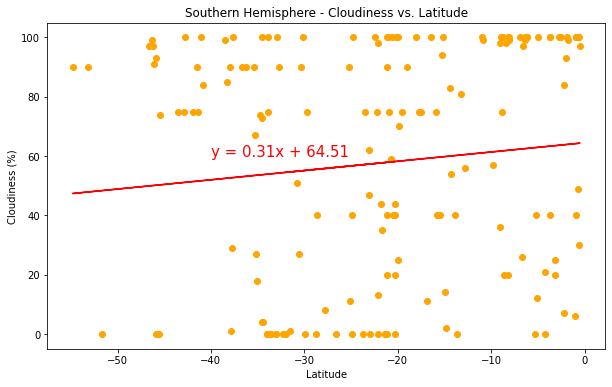

In [38]:
# Calculate the linear regression model for Southern Hemisphere - Cloudiness (%) vs. Latitude
x_values = clean_south_df["Latitude"]
y_values = clean_south_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(10, 6))
plt.scatter(x_values,y_values, color = "orange")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,60),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude")

# Save the figure
plt.savefig("../Images/south_coudiness_vs_latitude.png")

print(f"The r vale is: {rvalue}")
plt.show()

In [39]:
print("-Although there seems to be a positive correlation in the North and South regarding cloudiness, this isn't necessarily accurate as the data is quite visibly scattered.")

-Although there seems to be a positive correlation in the North and South regarding cloudiness, this isn't necessarily accurate as the data is quite visibly scattered.


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r vale is: 0.021630923701241866


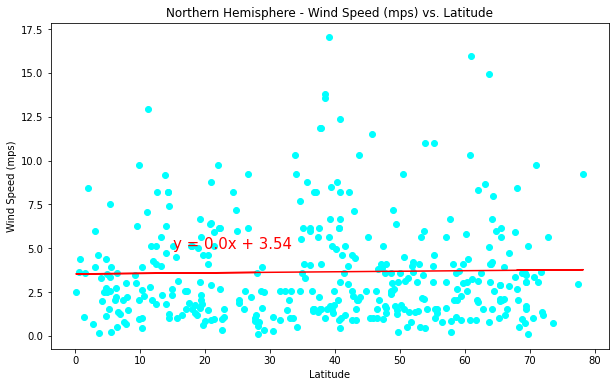

In [42]:
# Calculate the linear regression model for Northern Hemisphere - Wind Speed (mps) vs. Latitude
x_values = clean_north_df["Latitude"]
y_values = clean_north_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(10, 6))
plt.scatter(x_values,y_values, color = "cyan")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,5),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mps)")
plt.title("Northern Hemisphere - Wind Speed (mps) vs. Latitude")

# Save the figure
plt.savefig("../Images/north_wind_vs_latitude.png")

print(f"The r vale is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r vale is: -0.31026892621691415


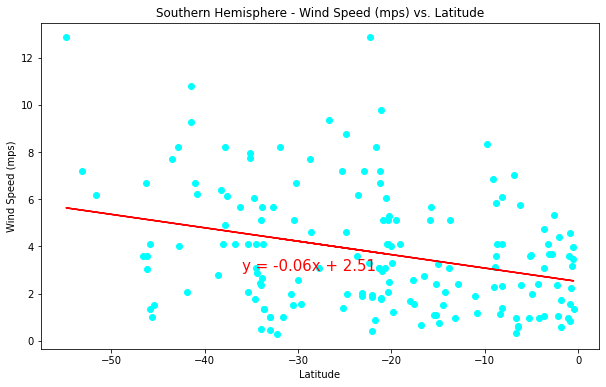

In [41]:
# Calculate the linear regression model for Southern Hemisphere - Wind Speed (mps) vs. Latitude
x_values = clean_south_df["Latitude"]
y_values = clean_south_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig1, ax1 = plt.subplots(figsize=(10, 6))
plt.scatter(x_values,y_values, color = "cyan")

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-36,3),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mps)")
plt.title("Southern Hemisphere - Wind Speed (mps) vs. Latitude")

# Save the figure
plt.savefig("../Images/south_wind_vs_latitude.png")

print(f"The r vale is: {rvalue}")
plt.show()

In [45]:
print("-Wind speed in the North has a very weak positive correlation and a slihtly stronger negative correlation in the South.")
print("-We can see from the graph that in the Southern Hemisphere, it wind speed slows down the closer we move towards the equator.")

-Wind speed in the North has a very weak positive correlation and a slihtly stronger negative correlation in the South.
-We can see from the graph that in the Southern Hemisphere, it wind speed slows down the closer we move towards the equator.
